**The Sparks Foundation - Data Science & Business Analytics Internship**

**TASK 1: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’**

Author-Sinchana Gowda


Steps to be followed:

-Importing the libraries

-Reading the dataset

-Data Cleaning

-Data preprocessing

-Data Exploration

-Data Visualization

In [1]:
# In this step we will import the required dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Reading the dataset
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [4]:
df.shape

(9994, 13)

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
    # Data cleaning and prerpocessing
    #removing the unnecessary columns 
    df=df.drop(columns=['Country','Postal Code'])

In [8]:
# checking for duplicate values
# dropping the duplicates
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

50
0


([<matplotlib.axis.XTick at 0x27524aafe20>,
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 864x432 with 0 Axes>

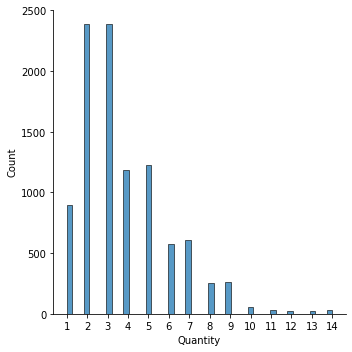

In [9]:
xdata = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.figure(figsize = (12,6))
sns.displot(df['Quantity'])
plt.xticks(xdata)

In [10]:
print("Total sales are "+ str(df['Sales'].max()))
print("Total profits are "+ str(df['Profit'].max()))

Total sales are 22638.48
Total profits are 8399.976


In [11]:
print(df.groupby('Segment').size())

Segment
Consumer       5160
Corporate      3008
Home Office    1776
dtype: int64


<AxesSubplot:ylabel='Segment'>

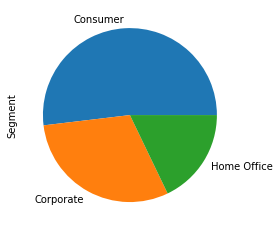

In [12]:
df["Segment"].value_counts().plot(kind='pie')

In [13]:
print(df.groupby('City').size())

City
Aberdeen        1
Abilene         1
Akron          21
Albuquerque    14
Alexandria     16
               ..
Woonsocket      4
Yonkers        15
York            5
Yucaipa         1
Yuma            4
Length: 531, dtype: int64


In [14]:
print(df.groupby('Region').size())

Region
Central    2315
East       2832
South      1620
West       3177
dtype: int64


<AxesSubplot:ylabel='Region'>

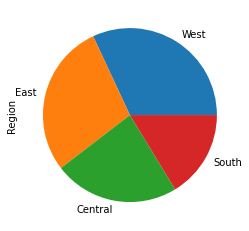

In [15]:
df["Region"].value_counts().plot(kind='pie')

In [16]:
print(df.groupby('Category').size())

Category
Furniture          2114
Office Supplies    5986
Technology         1844
dtype: int64


<AxesSubplot:ylabel='Category'>

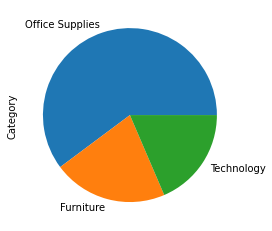

In [17]:
df["Category"].value_counts().plot(kind='pie')

                  Profit         Sales
Segment                               
Consumer     133939.5218  1.159418e+06
Corporate     91911.1606  7.059702e+05
Home Office   60246.8755  4.292117e+05


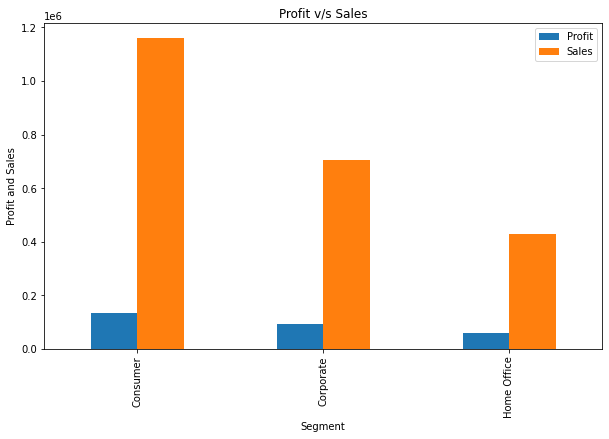

In [19]:
b=df.groupby("Segment")[["Profit","Sales"]].sum()
print(b)
b.plot(kind='bar',figsize=(10,6))
plt.title("Profit v/s Sales")
plt.ylabel("Profit and Sales")
plt.xlabel("Segment")
plt.show()

In [20]:
print(df.groupby('Sub-Category').size())

Sub-Category
Accessories     773
Appliances      466
Art             793
Binders        1518
Bookcases       226
Chairs          615
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     954
Labels          359
Machines        115
Paper          1344
Phones          888
Storage         845
Supplies        190
Tables          319
dtype: int64


<AxesSubplot:>

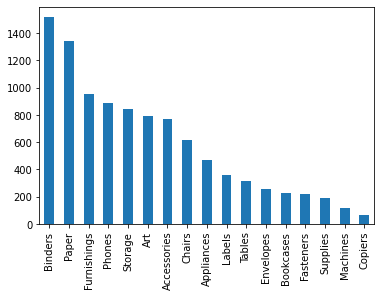

In [21]:
df["Sub-Category"].value_counts().plot(kind='bar')

                     Profit         Sales
Ship Mode                                
First Class      48910.4477  3.512746e+05
Same Day         15871.8869  1.283217e+05
Second Class     57425.5716  4.591240e+05
Standard Class  163889.6517  1.355879e+06


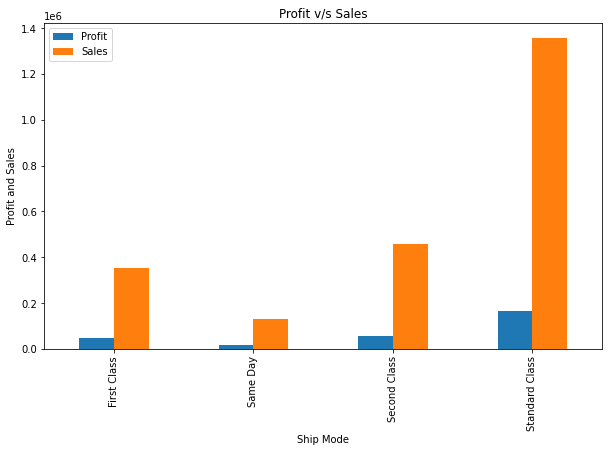

In [22]:
a=df.groupby("Ship Mode")[["Profit","Sales"]].sum()
print(a)
a.plot(kind='bar',figsize=(10,6))
plt.title("Profit v/s Sales")
plt.ylabel("Profit and Sales")
plt.xlabel("Ship Mode")
plt.show()

              Profit        Sales
Region                           
Central   39662.0474  500724.2708
East      91471.0909  677843.9080
South     46749.4303  391721.9050
West     108214.9893  724309.2935


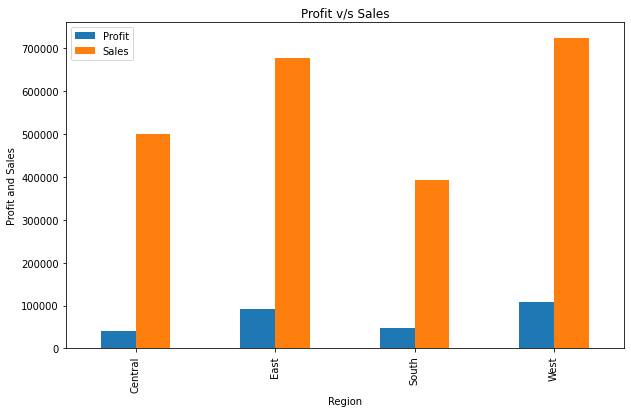

In [23]:
a=df.groupby("Region")[["Profit","Sales"]].sum()
print(a)
a.plot(kind='bar',figsize=(10,6))
plt.title("Profit v/s Sales")
plt.ylabel("Profit and Sales")
plt.xlabel("Region")
plt.show()

<AxesSubplot:>

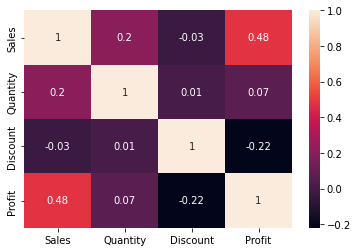

In [24]:
sns.heatmap(np.round(df.corr(),2), annot=True)

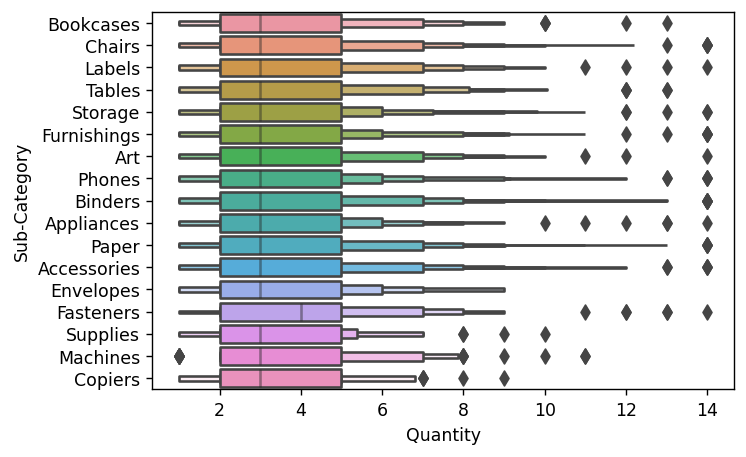

In [25]:
plt.figure(dpi=125)
sns.boxenplot(y = 'Sub-Category', x = 'Quantity', data=df )
plt.show()

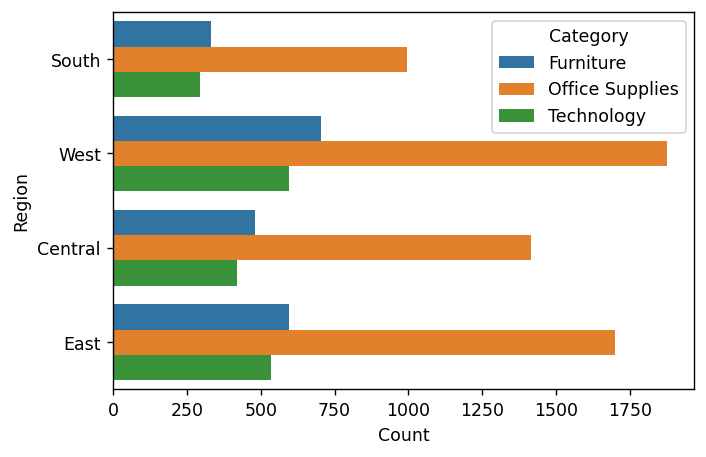

In [26]:
plt.figure(dpi=125)
sns.countplot(y ='Region', hue = "Category", data = df) 
plt.xlabel('Count')
plt.show()

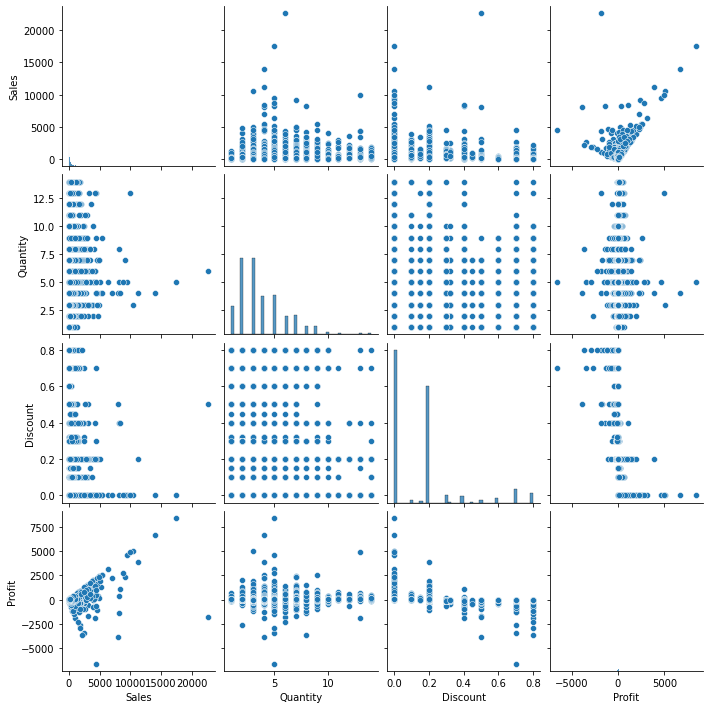

In [27]:
sns.pairplot(df)

Text(0, 0.5, '')

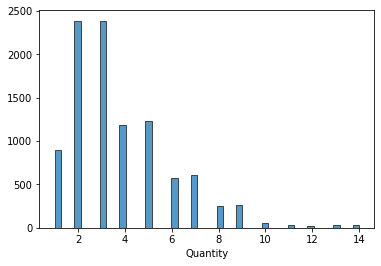

In [28]:
sns.histplot(df['Quantity'])
plt.ylabel('')


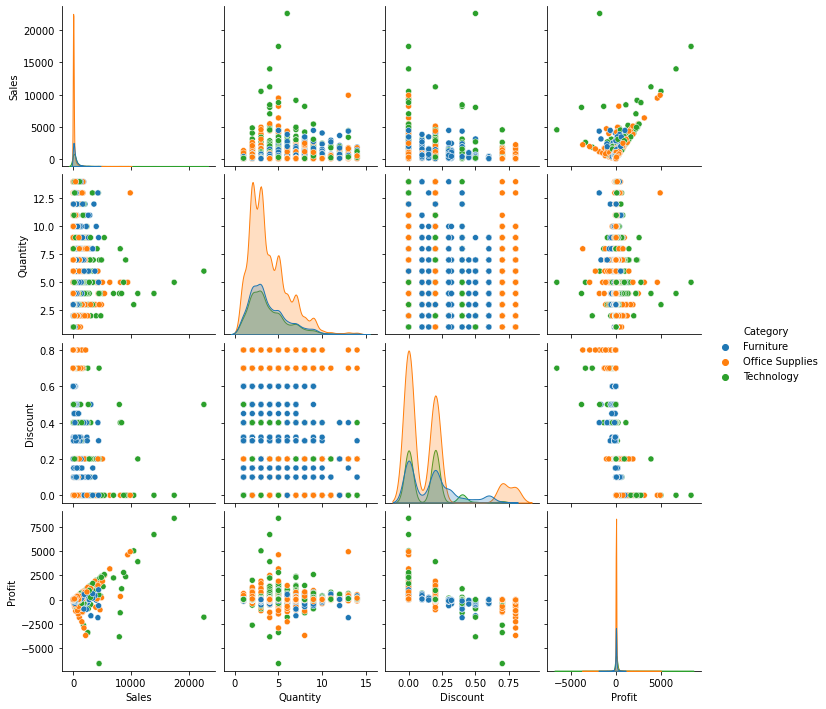

In [29]:
sns.pairplot(df, hue="Category")

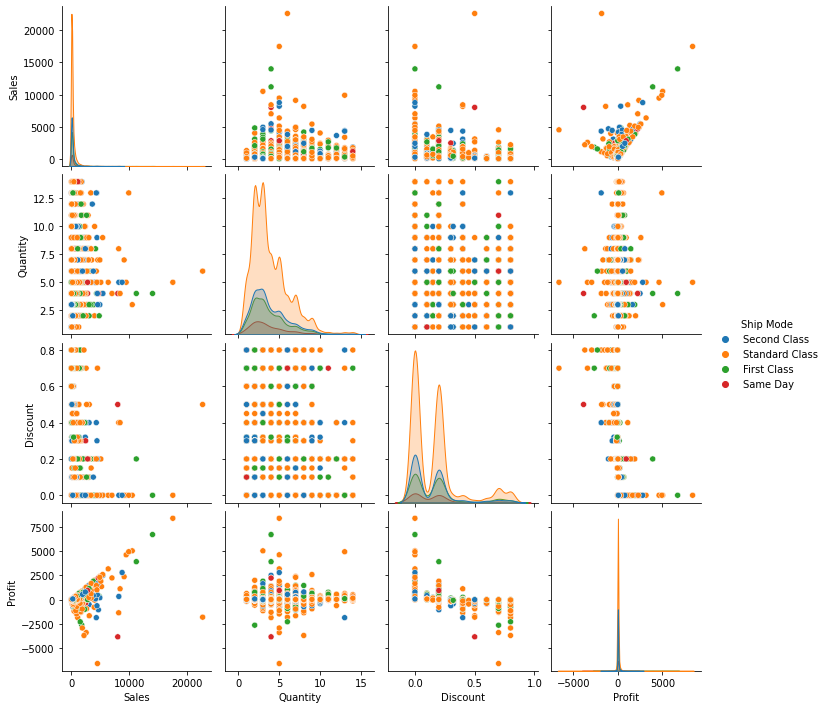

In [30]:
sns.pairplot(df, hue="Ship Mode")

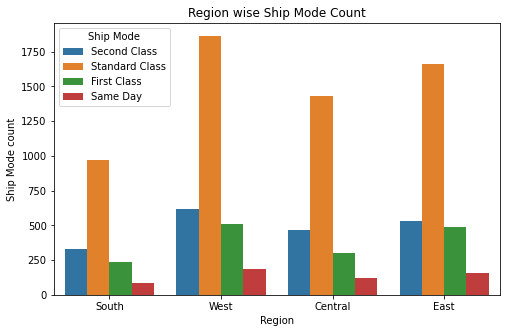

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x="Region", hue="Ship Mode", data=df)
plt.title("Region wise Ship Mode Count")
plt.ylabel("Ship Mode count")
plt.show()

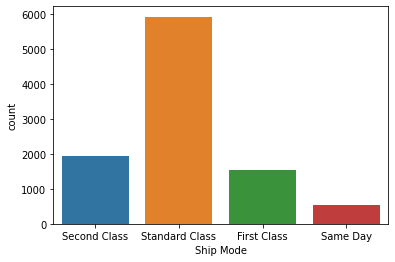

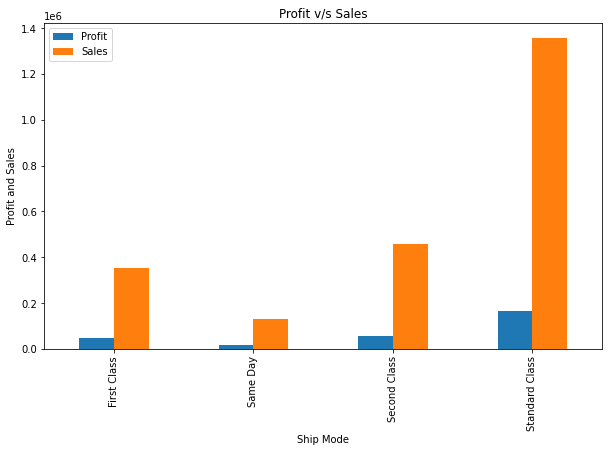

In [32]:
df["Ship Mode"].value_counts()
sns.countplot(x=df["Ship Mode"])
e=df.groupby("Ship Mode")[["Profit","Sales"]].sum()
e
e.plot(kind="bar", figsize=(10,6))
plt.title("Profit v/s Sales")
plt.ylabel("Profit and Sales")
plt.show()

Text(0, 0.5, 'Number of Buyers')

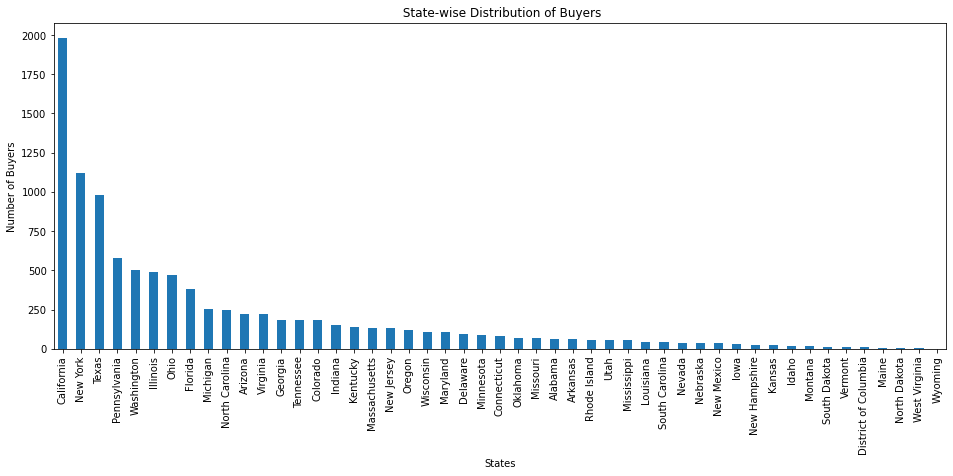

In [33]:
s=df['State'].value_counts()
s
s.plot(kind='bar',figsize=(16,6))
plt.title(" State-wise Distribution of Buyers")
plt.xlabel("States")
plt.ylabel("Number of Buyers")


Text(0, 0.5, 'Profit')

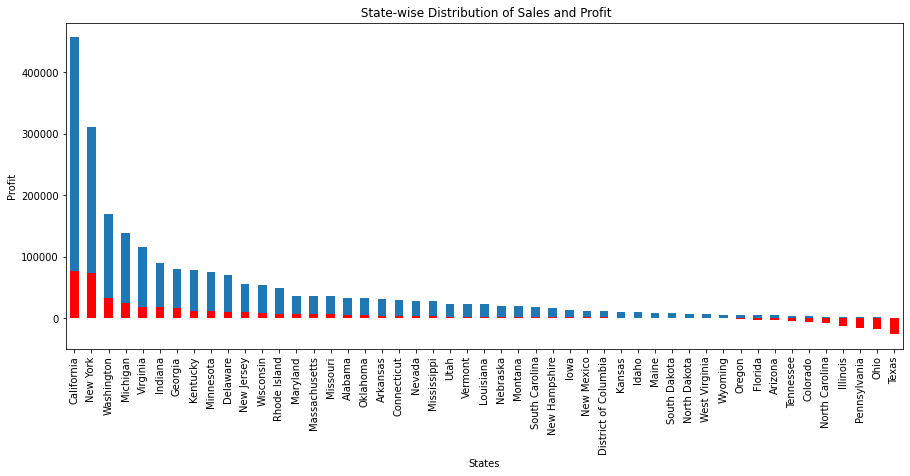

In [34]:
g=df.groupby(["State"]).Sales.sum()
h=df.groupby(["State"]).Profit.sum()


g.sort_values(ascending=False).plot(kind="bar",figsize=(15,6))
plt.xlabel("States")
plt.ylabel("Sales")


h.sort_values(ascending=False).sort_values(ascending=False).plot(kind="bar",figsize=(15,6),color="red")
plt.title(" State-wise Distribution of Sales and Profit")
plt.xlabel("States")
plt.ylabel("Profit")

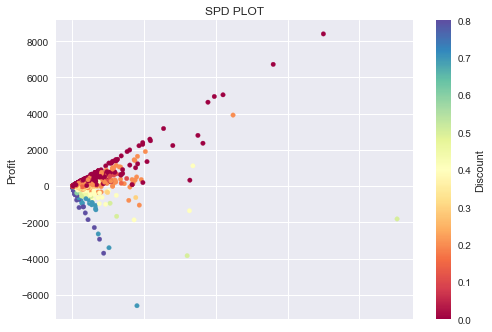

In [35]:
plt.style.use("seaborn")
df.plot(kind="scatter",x="Sales",y="Profit",c="Discount",colormap="Spectral")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("SPD PLOT")
plt.show()

**Conclusions:**

1.As Discount increases Profit decreases Discount and Sales have a lesser relation, Sales decrease with increasing discount.

2.The states that have the highest number of customers are - California,New York,Texas The states that have the lowest number of customers are - Wyoming, West Virginia, North Dakota

3.More focus on Standard class,as customers opt it more.

4.The most amount of sales and profit are from Technology & Office supplies,although improvements can be done to Furniture supplies.

5.Most of the customers buy around 2-3 items.

6.As Profit increases , Sales increases As Discount increases, Profit decreases

7.Office Supplies is the most sold product in all regions and these products should be focused on for expansion along with other categories

8.The mean quantity is lower for all except fasteners and hence quantity of all other categories must be increased.

9.The seaborn heat-map can be used to visualize the correlations among variables.As you can see Profit and sales have the highest correlation of about 48%.Discount and profits are negatively correlated with about 22%.Postal code hardly has any correlation with other variables.

10.We can clearly see that the sales and profit are more in the West whereas South has the least.Trying to expand sales in south to increase profits is recommended.

11.The consumer segment is always in demand and should be focused more as it has the most amount of profit and sales
